<a href="https://colab.research.google.com/github/Bright-Momo/SimplifiedJournalsGame/blob/main/NumberofEqulibria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install nashpy


In [ ]:
import nashpy as nash
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [ ]:

# Parameters
alpha = 0.6    # Probability of a good paper
epsilon = 0.1  # Probability of misclassifying a good paper as bad
lam = 0.1       # Probability of misclassifying a bad paper as good
r = 1.0         # Reward for author when accepted
c = 0.5         # Cost for author when rejected



In [ ]:
# Journal payoff as average quality (as an example)
def Q(alpha, epsilon, lam):
    numerator = alpha * (1 - epsilon)
    denominator = alpha * (1 - epsilon) + (1 - alpha) * lam
    return numerator / denominator

In [ ]:
# Author: Rows = [Always_Submit, Only_Submit_Good, Only_Submit_Bad, No_Submit]
# Journal: Columns = [Always_Accept, Only_Accept_Good, Only_Accept_Bad, Reject_All]
# Define a function that show the probability that a paper will be accepted
def acceptance_probability(is_good_paper,journal_strategy):
    if journal_strategy == 0:
        return 1.0
    elif journal_strategy == 1:
        if is_good_paper:
            return 1-epsilon
        else:
            return lam
    elif journal_strategy == 2:
      if is_good_paper:
        return epsilon
      else:
        return 1-lam
    else:
      return 0.0

In [ ]:




def create_game(alpha, epsilon, lam, r, c):
    """
    Constructs a 4x4 Nash game with:
      Author (rows):
        0 -> Always_Submit
        1 -> Only_Submit_Good
        2 -> Only_Submit_Bad
        3 -> No_Submit

      Journal (columns):
        0 -> Always_Accept
        1 -> Only_Accept_Good
        2 -> Only_Accept_Bad
        3 -> Reject_All
    """

    # Initialize 4x4 payoff matrices
    author_payoffs = np.zeros((4, 4))
    journal_payoffs = np.zeros((4, 4))

    # Loop over each Author strategy i
    for i in range(4):
        # Determine the probability of submitting a good/bad paper for the Author's strategy
        if i == 0:  # Always_Submit
            good_submit_prob = alpha
            bad_submit_prob  = 1 - alpha
        elif i == 1:  # Only_Submit_Good
            good_submit_prob = alpha
            bad_submit_prob  = 0.0
        elif i == 2:  # Only_Submit_Bad
            good_submit_prob = 0.0
            bad_submit_prob  = 1 - alpha
        else:  # 3 -> No_Submit
            good_submit_prob = 0.0
            bad_submit_prob  = 0.0

        # Loop over each Journal strategy j
        for j in range(4):
            # Probability of acceptance for good and bad papers
            p_good_accepted = acceptance_probability(True, j)
            p_bad_accepted  = acceptance_probability(False, j)

            # Overall acceptance rate from the Author's perspective
            accept_rate = good_submit_prob * p_good_accepted + bad_submit_prob * p_bad_accepted
            # Probability of submitting (any paper) at all
            submit_rate = good_submit_prob + bad_submit_prob
            # Probability of being rejected
            reject_rate = submit_rate - accept_rate

            # Author's payoff: accepted -> gain r, rejected -> lose c
            U_author = accept_rate * r - reject_rate * c
            author_payoffs[i, j] = U_author

            # Journal's payoff: fraction of good papers among accepted ones
            total_accepted = good_submit_prob * p_good_accepted + bad_submit_prob * p_bad_accepted
            if total_accepted > 1e-9:
                fraction_good = (good_submit_prob * p_good_accepted) / total_accepted
            else:
                fraction_good = 0.0
            journal_payoffs[i, j] = fraction_good

    # Create and return a Nash Game using nashpy
    return nash.Game(author_payoffs, journal_payoffs)


In [ ]:
def probability_of_scientist__self_selection(alpha, epsilon, lam, r, c, author_index=1):

    game = create_game(alpha, epsilon, lam, r, c)  # Your 4x4 create_game function
    equilibria = list(game.support_enumeration())
    if not equilibria:
        # If no equilibria are found, return 0 or handle as needed
        return 0.0

    # equilibria[0] is typically ((p_a0, p_a1, p_a2, p_a3), (p_j0, p_j1, p_j2, p_j3))
    # The first tuple is the Author's mixed strategy
    author_mixed_strategy = equilibria[0][0]
    return author_mixed_strategy[author_index]




New version

In [24]:
def number_of_equlibrium(alpha, epsilon, lam, r, c, journal_index=1):

    game = create_game(alpha, epsilon, lam, r, c)  # Your 4x4 create_game function
    equilibria = list(game.support_enumeration())
    return len(equilibria)

In [ ]:
def probability_of_journal__selection(alpha, epsilon, lam, r, c, journal_index=1):

    game = create_game(alpha, epsilon, lam, r, c)  # Your 4x4 create_game function
    equilibria = list(game.support_enumeration())
    if not equilibria:
        return 0.0

    # The second tuple is the Journal's mixed strategy
    journal_mixed_strategy = equilibria[0][1]
    return journal_mixed_strategy[journal_index]

In [ ]:
probability_of_scientist__self_selection(alpha, epsilon, lam, r, c)

0.0

In [ ]:
probability_of_scientist__self_selection(0.5, epsilon=0.1, lam=0.4, r=5, c=1)

0.0

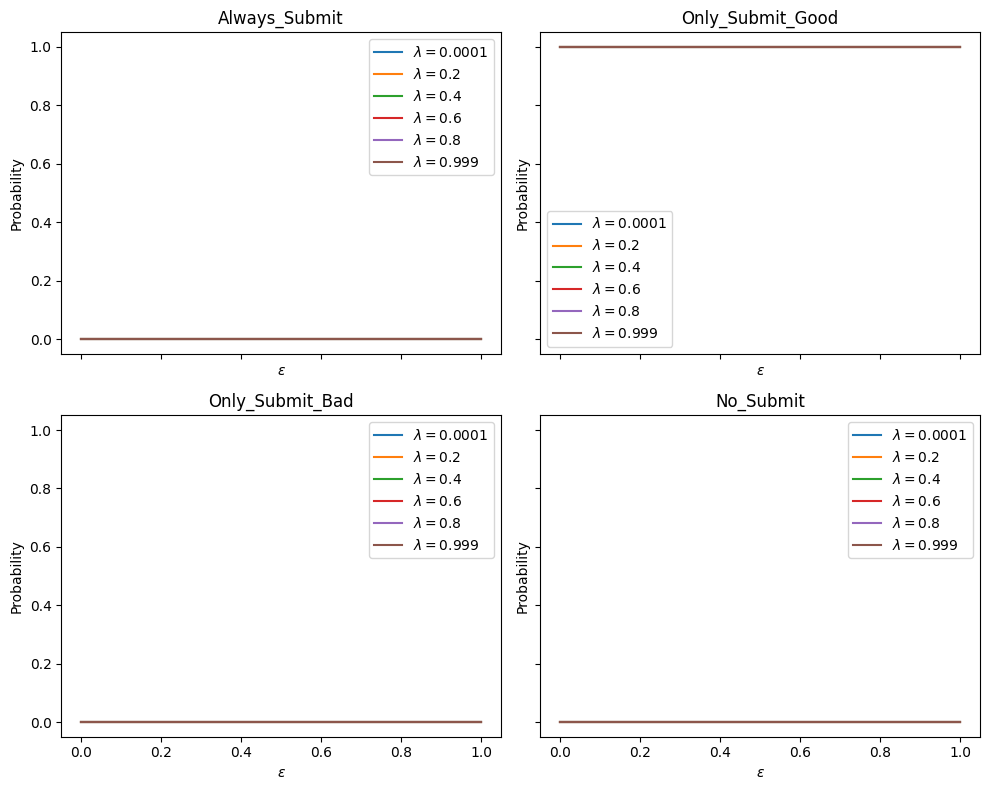

In [ ]:
x = np.linspace(0.0, 1.0, 100, True)
lam_values = [0.0001, 0.2, 0.4, 0.6, 0.8, 0.999]
author_strategies = [0, 1, 2, 3]
titles = ["Always_Submit", "Only_Submit_Good", "Only_Submit_Bad", "No_Submit"]

fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharex=True, sharey=True)

for ax, strategy, title in zip(axes.flatten(), author_strategies, titles):
    for lam_val in lam_values:
        y = []
        for eps_val in x:
            prob = probability_of_scientist__self_selection(
                alpha=0.5,
                epsilon=eps_val,
                lam=lam_val,
                r=5,
                c=1,
                author_index=strategy
            )
            y.append(prob if prob is not None else 0.0)
        ax.plot(x, y, label=rf"$\lambda = {lam_val}$")
    ax.set_title(title)
    ax.legend()
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel("Probability")

plt.tight_layout()
plt.show()


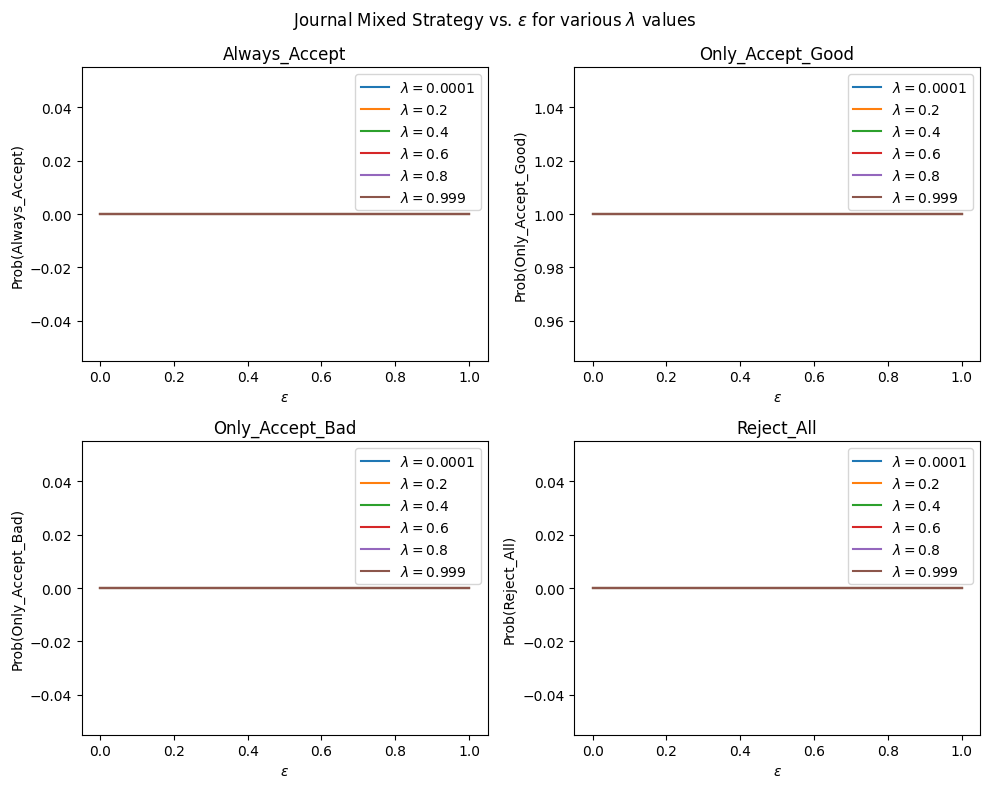

In [ ]:
lam_values = [0.0001, 0.2, 0.4, 0.6, 0.8, 0.999]
x = np.linspace(0.0, 1.0, 100, True)

# Name mapping for Journal strategies
journal_strategy_names = {
    0: "Always_Accept",
    1: "Only_Accept_Good",
    2: "Only_Accept_Bad",
    3: "Reject_All"
}

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for idx, j_idx in enumerate([0, 1, 2, 3]):
    row, col = divmod(idx, 2)
    for lam_val in lam_values:
        y = []
        for eps_val in x:
            prob = probability_of_journal__selection(
                alpha=0.5,
                epsilon=eps_val,
                lam=lam_val,
                r=5,
                c=1,
                journal_index=j_idx
            )
            y.append(prob if prob is not None else 0.0)
        axes[row][col].plot(x, y, label=rf"$\lambda = {lam_val}$")
    axes[row][col].legend()
    axes[row][col].set_xlabel(r"$\epsilon$")
    axes[row][col].set_ylabel(f"Prob({journal_strategy_names[j_idx]})")
    axes[row][col].set_title(f"{journal_strategy_names[j_idx]}")

plt.suptitle("Journal Mixed Strategy vs. $\epsilon$ for various $\lambda$ values")
plt.tight_layout()
plt.show()


In [25]:

# Define the range for x and y
x = np.linspace(0.0001, 0.999, 100) # epsilon
y = np.linspace(0.0001, 0.999, 100) # lambda

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Define a function that takes x and y as input
def condition_function(x, y):

    return number_of_equlibrium(0.5, epsilon=x, lam=y, r=1, c=1)

# Initialize an empty binary matrix
binary_matrix = np.zeros_like(X, dtype=int)

# Populate the binary matrix using a loop
for i in range(binary_matrix.shape[0]):  # Loop over rows
    for j in range(binary_matrix.shape[1]):  # Loop over columns
        binary_matrix[i, j] = condition_function(X[i, j], Y[i, j])



# Visualize the binary matrix
plt.imshow(binary_matrix, extent=(0, 1, 0, 1), origin='lower', cmap='binary')
plt.colorbar(label='Binary Value')
plt.xlabel('Epsilon')
plt.ylabel('Lambda')
plt.title('Selective journal')
plt.show()



KeyboardInterrupt: 

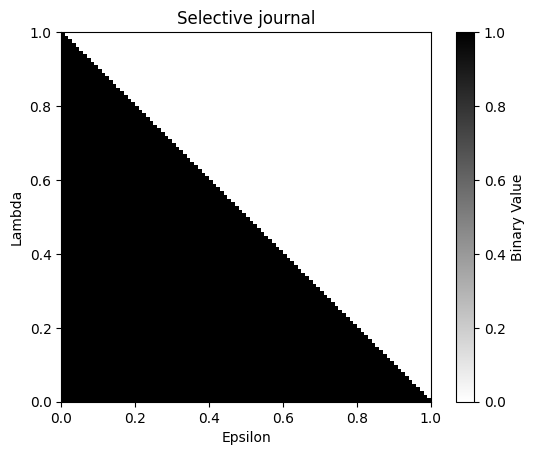

In [ ]:

# Define the range for x and y
x = np.linspace(0.0001, 0.999, 100) # epsilon
y = np.linspace(0.0001, 0.999, 100) # lambda

# Create a meshgrid
X, Y = np.meshgrid(x, y)

# Define a function that takes x and y as input
def condition_function(x, y):
    return probability_of_journal__selection(0.5, epsilon=x, lam=y, r=1, c=1)

# Initialize an empty binary matrix
binary_matrix = np.zeros_like(X, dtype=int)

# Populate the binary matrix using a loop
for i in range(binary_matrix.shape[0]):  # Loop over rows
    for j in range(binary_matrix.shape[1]):  # Loop over columns
        if condition_function(X[i, j], Y[i, j]):
            binary_matrix[i, j] = 1
        else:
            binary_matrix[i, j] = 0

# Visualize the binary matrix
plt.imshow(binary_matrix, extent=(0, 1, 0, 1), origin='lower', cmap='binary')
plt.colorbar(label='Binary Value')
plt.xlabel('Epsilon')
plt.ylabel('Lambda')
plt.title('Selective journal')
plt.show()



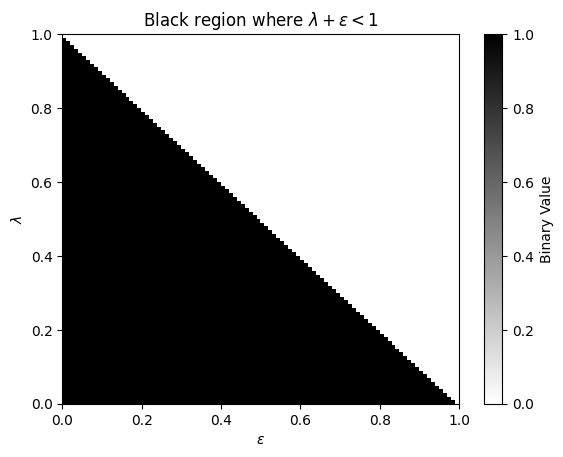

In [ ]:

import matplotlib.pyplot as plt


n_points = 100
epsilon_vals = np.linspace(0, 1, n_points)
lambda_vals = np.linspace(0, 1, n_points)

X, Y = np.meshgrid(epsilon_vals, lambda_vals)

binary_matrix = np.zeros((n_points, n_points), dtype=int)


for i in range(n_points):
    for j in range(n_points):
        if X[i, j] + Y[i, j] < 1:
            binary_matrix[i, j] = 1
        else:
            binary_matrix[i, j] = 0

plt.imshow(
    binary_matrix,
    extent=(0, 1, 0, 1),
    origin='lower',
    cmap='binary',
    aspect='auto'
)
plt.colorbar(label='Binary Value')
plt.xlabel(r'$\epsilon$')
plt.ylabel(r'$\lambda$')
plt.title('Black region where $\lambda + \epsilon < 1$')
plt.show()
